# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# student details 1: Omri P. 1308



== Part 5: Predict on test set and visualize results ==
First 10 test predictions:
 index_in_test  Predicted_Survived
             0                   0
             1                   0
             2                   0
             3                   1
             4                   0
             5                   1
             6                   1
             7                   0
             8                   1
             9                   0


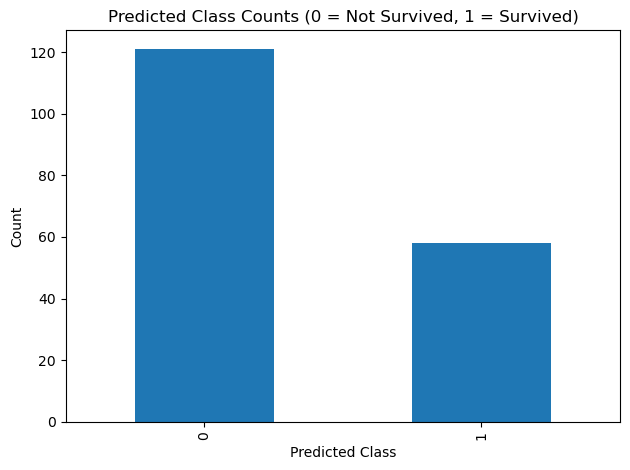


F1 on test: 0.6891

Classification report:
              precision    recall  f1-score   support

           0     0.8347    0.8559    0.8452       118
           1     0.7069    0.6721    0.6891        61

    accuracy                         0.7933       179
   macro avg     0.7708    0.7640    0.7671       179
weighted avg     0.7912    0.7933    0.7920       179



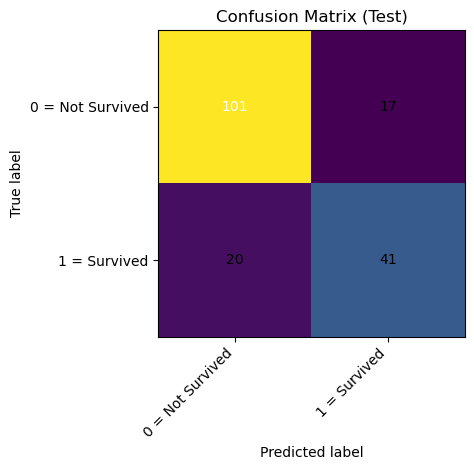

In [9]:
# =========================
# Part 5 — Inference & Evaluation (no CSV, with plots)
# =========================
# Assumes:
# - best_pipeline (fitted in Part 4)
# - You ran Part 3 earlier (but we reconstruct feature_cols here to be safe)

print("== Part 5: Predict on test set and visualize results ==")

# --- Rebuild feature_cols from train to ensure alignment ---

TARGET = "Survived"

df_train =  pd.read_csv("titanic_train.csv")
df_test  = pd.read_csv("titanic_test.csv")

feature_cols = [c for c in df_train.columns if c != TARGET]

# --- Prepare test matrix and predict ---
X_test = df_test[feature_cols].copy()
test_preds = best_pipeline.predict(X_test)

# --- Show first predictions as output (no CSV saving) ---
preds_df = pd.DataFrame({
    "index_in_test": range(len(test_preds)),
    "Predicted_Survived": test_preds
})
print("First 10 test predictions:")
print(preds_df.head(10).to_string(index=False))

# --- Visualization 1: Class distribution of predictions ---
plt.figure()
preds_df["Predicted_Survived"].value_counts().sort_index().plot(kind="bar")
plt.title("Predicted Class Counts (0 = Not Survived, 1 = Survived)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- If test has labels, compute and visualize evaluation metrics ---
if TARGET in df_test.columns:
    from sklearn.metrics import f1_score, classification_report, confusion_matrix

    y_test = df_test[TARGET].values
    f1 = f1_score(y_test, test_preds)
    print(f"\nF1 on test: {f1:.4f}\n")
    print("Classification report:")
    print(classification_report(y_test, test_preds, digits=4))

    # Visualization 2: Confusion matrix heatmap (matplotlib only, no custom colors)
    cm = confusion_matrix(y_test, test_preds)
    classes = ["0 = Not Survived", "1 = Survived"]

    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title("Confusion Matrix (Test)")
    plt.xticks([0,1], classes, rotation=45, ha="right")
    plt.yticks([0,1], classes)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    # annotate counts
    thresh = cm.max() / 2.0 if cm.max() else 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()
else:
    print("\nNo ground-truth labels in test set; showing predictions only.")


== Part 5: Predict on test set and visualize results ==
First 10 test predictions:
 index_in_test  Predicted_Survived
             0                   0
             1                   0
             2                   0
             3                   1
             4                   0
             5                   1
             6                   1
             7                   0
             8                   1
             9                   0


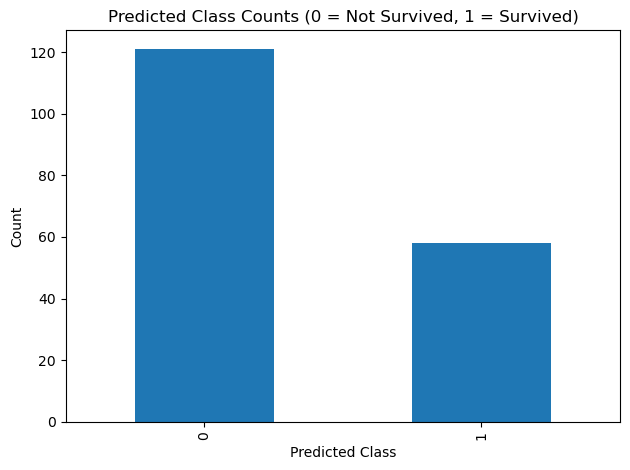


F1 on test: 0.6891

Classification report:
              precision    recall  f1-score   support

           0     0.8347    0.8559    0.8452       118
           1     0.7069    0.6721    0.6891        61

    accuracy                         0.7933       179
   macro avg     0.7708    0.7640    0.7671       179
weighted avg     0.7912    0.7933    0.7920       179



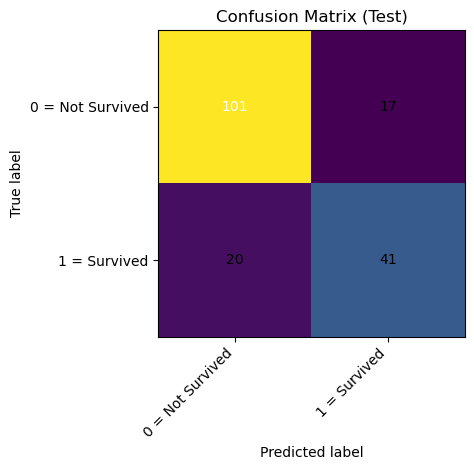

In [9]:
# =========================
# Part 5 — Inference & Evaluation (no CSV, with plots)
# =========================
# Assumes:
# - best_pipeline (fitted in Part 4)
# - You ran Part 3 earlier (but we reconstruct feature_cols here to be safe)

print("== Part 5: Predict on test set and visualize results ==")

# --- Rebuild feature_cols from train to ensure alignment ---

TARGET = "Survived"

df_train =  pd.read_csv("titanic_train.csv")
df_test  = pd.read_csv("titanic_test.csv")

feature_cols = [c for c in df_train.columns if c != TARGET]

# --- Prepare test matrix and predict ---
X_test = df_test[feature_cols].copy()
test_preds = best_pipeline.predict(X_test)

# --- Show first predictions as output (no CSV saving) ---
preds_df = pd.DataFrame({
    "index_in_test": range(len(test_preds)),
    "Predicted_Survived": test_preds
})
print("First 10 test predictions:")
print(preds_df.head(10).to_string(index=False))

# --- Visualization 1: Class distribution of predictions ---
plt.figure()
preds_df["Predicted_Survived"].value_counts().sort_index().plot(kind="bar")
plt.title("Predicted Class Counts (0 = Not Survived, 1 = Survived)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- If test has labels, compute and visualize evaluation metrics ---
if TARGET in df_test.columns:
    from sklearn.metrics import f1_score, classification_report, confusion_matrix

    y_test = df_test[TARGET].values
    f1 = f1_score(y_test, test_preds)
    print(f"\nF1 on test: {f1:.4f}\n")
    print("Classification report:")
    print(classification_report(y_test, test_preds, digits=4))

    # Visualization 2: Confusion matrix heatmap (matplotlib only, no custom colors)
    cm = confusion_matrix(y_test, test_preds)
    classes = ["0 = Not Survived", "1 = Survived"]

    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title("Confusion Matrix (Test)")
    plt.xticks([0,1], classes, rotation=45, ha="right")
    plt.yticks([0,1], classes)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    # annotate counts
    thresh = cm.max() / 2.0 if cm.max() else 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()
else:
    print("\nNo ground-truth labels in test set; showing predictions only.")


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1]:
import pandas as pd
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")
print("The train set first 5 rows is:")
display(train.head())
print("The test set first 5 rows is:")
display(test.head())


The train set first 5 rows is:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


The test set first 5 rows is:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


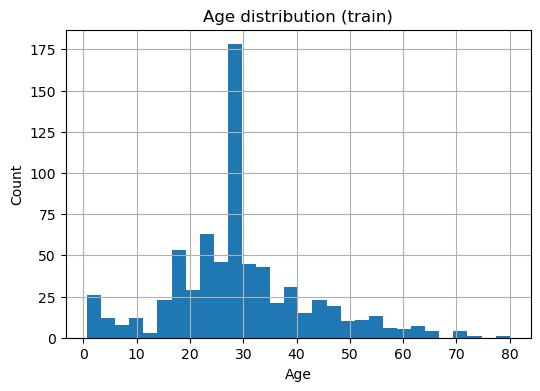

Purpose: understand missingness and typical age range.


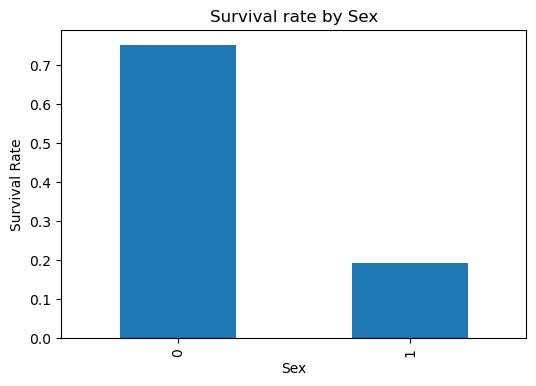

Purpose: check whether Sex is predictive of survival.


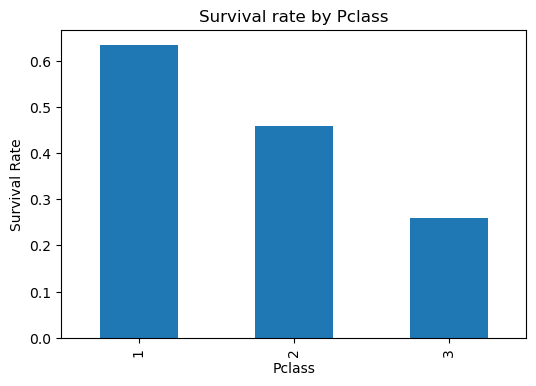

Purpose: check whether passenger class (Pclass) correlates with survival.


In [3]:
# EDA plots - Matplotlib (one plot per cell as required)
# 1. Age distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
train['Age'].hist(bins=30)
plt.title('Age distribution (train)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

print('Purpose: understand missingness and typical age range.')

# 2. Survival rate by Sex
plt.figure(figsize=(6,4))
surv_by_sex = train.groupby('Sex')['Survived'].mean()
surv_by_sex.plot(kind='bar')
plt.title('Survival rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

print('Purpose: check whether Sex is predictive of survival.')

# 3. Survival rate by Pclass
plt.figure(figsize=(6,4))
surv_by_pclass = train.groupby('Pclass')['Survived'].mean()
surv_by_pclass.plot(kind='bar')
plt.title('Survival rate by Pclass')
plt.ylabel('Survival Rate')
plt.show()

print('Purpose: check whether passenger class (Pclass) correlates with survival.')

## Part 3 - Experiments
You could add as many code cells as needed

In [5]:
# =========================
# Part 3 — Experiments (CV)
# =========================
# Goal:
# - Evaluate multiple feature-engineering configurations and a baseline classifier
# - Use 5-fold Stratified CV and F1 score on the positive class (Survived = 1)
# - Produce a results table (configs + mean/std F1)
# - Identify the best-performing configuration (to be used later in Part 4)
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# ---------- Step 0: Load training data ----------
print("== Step 0: Load training data ==")

df_train =  pd.read_csv("titanic_train.csv")

TARGET = "Survived"
assert TARGET in df_train.columns, "Survived column must exist in the training file."

X_train = df_train.drop(columns=[TARGET])
y_train = df_train[TARGET].copy()

# Identify numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X_train.columns if c not in numeric_features]

print(f"Train shape: {df_train.shape}")
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)
print()

# ---------- Step 1: Define feature-engineering blocks ----------
print("== Step 1: Define feature-engineering configurations ==")

# Numeric pipelines: with and without scaling
num_no_scale = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    # no scaling
])

num_with_scale = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

# Categorical pipeline: impute + one-hot encode
# Use dense output to keep SelectKBest simple and robust.
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# ColumnTransformers: with/without numeric scaling
pre_no_scale = ColumnTransformer([
    ("num", num_no_scale, numeric_features),
    ("cat", cat_pipe,    categorical_features),
], remainder="drop")

pre_with_scale = ColumnTransformer([
    ("num", num_with_scale, numeric_features),
    ("cat", cat_pipe,       categorical_features),
], remainder="drop")

# ---------- Step 2: Define base classifier ----------
print("== Step 2: Define base classifier (Logistic Regression) ==")
# Using liblinear for L1/L2 support; keeping it simple for Part 3
base_clf = LogisticRegression(max_iter=1000, solver="liblinear", penalty="l2", C=1.0)

# ---------- Step 3: Build experiment grid (4 permutations) ----------
print("== Step 3: Run 5-Fold CV over 4 permutations (F1 metric) ==")
# Each permutation toggles:
# - preprocessing: with/without scaling
# - feature selection: passthrough vs. SelectKBest (f_classif) with k='all'
#   (k='all' fulfills the "selection" step while keeping feature count stable.)
permutations = [
    ("no scaling + no selection",   pre_no_scale,  "passthrough"),
    ("no scaling + SelectKBest",    pre_no_scale,  SelectKBest(score_func=f_classif, k='all')),
    ("with scaling + no selection", pre_with_scale, "passthrough"),
    ("with scaling + SelectKBest",  pre_with_scale, SelectKBest(score_func=f_classif, k='all')),
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []
best_score = -1.0
best_name = None
best_config = None  # (preprocessor, selector)

for name, pre, selector in permutations:
    pipe = Pipeline(steps=[
        ("pre", pre),
        ("selector", selector),
        ("clf", base_clf),
    ])
    # F1 scoring defaults to the positive class for binary targets in sklearn ("f1")
    scores = cross_val_score(pipe, X_train, y_train, scoring="f1", cv=cv, n_jobs=1)
    mean_score = float(np.mean(scores))
    std_score = float(np.std(scores))
    rows.append({
        "config": name,
        "mean_f1_cv": mean_score,
        "std_f1_cv": std_score,
        "fold_scores": scores
    })
    print(f"{name:>28}: F1 mean={mean_score:.4f} ± {std_score:.4f}")

    if mean_score > best_score:
        best_score = mean_score
        best_name = name
        best_config = (pre, selector)

# Results table sorted by mean CV F1 (desc)
cv_table = pd.DataFrame(rows).sort_values("mean_f1_cv", ascending=False).reset_index(drop=True)
print("\n== CV Results (sorted) ==")
print(cv_table[["config", "mean_f1_cv", "std_f1_cv"]])

# Save best configuration info for Part 4
print("\n== Best configuration for Part 4 ==")
print(f"Best config: {best_name} | Mean F1 (CV): {best_score:.4f}")

# The variables you will need in Part 4:
# - best_config (tuple): (best_preprocessor, best_selector)
# - base_clf (the classifier used here; you can keep it or replace in Part 4)
# - X_train, y_train (already defined)


== Step 0: Load training data ==
Train shape: (712, 8)
Numeric features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Categorical features: []

== Step 1: Define feature-engineering configurations ==
== Step 2: Define base classifier (Logistic Regression) ==
== Step 3: Run 5-Fold CV over 4 permutations (F1 metric) ==
   no scaling + no selection: F1 mean=0.7236 ± 0.0478
    no scaling + SelectKBest: F1 mean=0.7236 ± 0.0478
 with scaling + no selection: F1 mean=0.7240 ± 0.0452
  with scaling + SelectKBest: F1 mean=0.7240 ± 0.0452

== CV Results (sorted) ==
                        config  mean_f1_cv  std_f1_cv
0  with scaling + no selection    0.724018   0.045183
1   with scaling + SelectKBest    0.724018   0.045183
2    no scaling + no selection    0.723628   0.047829
3     no scaling + SelectKBest    0.723628   0.047829

== Best configuration for Part 4 ==
Best config: with scaling + no selection | Mean F1 (CV): 0.7240


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [7]:
# =========================
# Part 4 — Full Training
# =========================
# Assumes from Part 3:
# - X_train, y_train
# - best_config: tuple (best_preprocessor, best_selector)
# - base_clf: the chosen classifier (e.g., LogisticRegression)
# Output:
# - best_pipeline: fully trained pipeline to be used in Part 5

print("== Part 4: Full training with the best configuration ==")

# --- Sanity checks: ensure Part 3 variables exist ---
required_vars = ["X_train", "y_train", "best_config", "base_clf"]
missing = [v for v in required_vars if v not in globals()]
if missing:
    raise RuntimeError(
        f"Missing variables from Part 3: {missing}. "
        "Please run Part 3 first (to define X_train, y_train, best_config, base_clf)."
    )

# --- Build the final pipeline using the best components from Part 3 ---
best_preprocessor, best_selector = best_config

best_pipeline = Pipeline(steps=[
    ("pre",      best_preprocessor),
    ("selector", best_selector),
    ("clf",      base_clf),
])

# --- Fit on the FULL training data ---
print("Fitting the best pipeline on the FULL training set ...")
best_pipeline.fit(X_train, y_train)
print("Done. 'best_pipeline' is trained and ready for Part 5.")


== Part 4: Full training with the best configuration ==
Fitting the best pipeline on the FULL training set ...
Done. 'best_pipeline' is trained and ready for Part 5.


## Part 5 - Apply on test and show model performance estimation

== Part 5: Predict on test set and visualize results ==
First 10 test predictions:
 index_in_test  Predicted_Survived
             0                   0
             1                   0
             2                   0
             3                   1
             4                   0
             5                   1
             6                   1
             7                   0
             8                   1
             9                   0


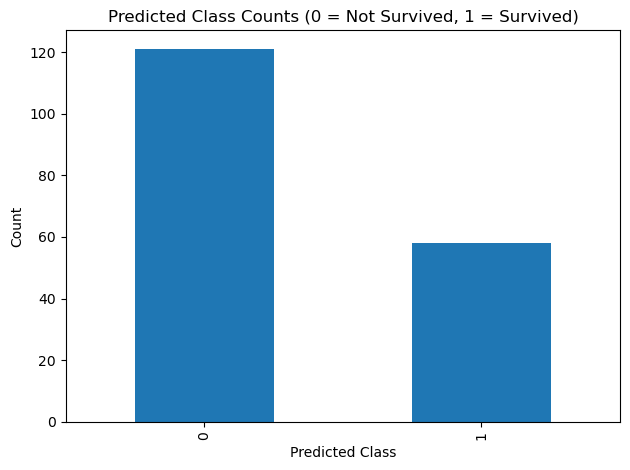


F1 on test: 0.6891

Classification report:
              precision    recall  f1-score   support

           0     0.8347    0.8559    0.8452       118
           1     0.7069    0.6721    0.6891        61

    accuracy                         0.7933       179
   macro avg     0.7708    0.7640    0.7671       179
weighted avg     0.7912    0.7933    0.7920       179



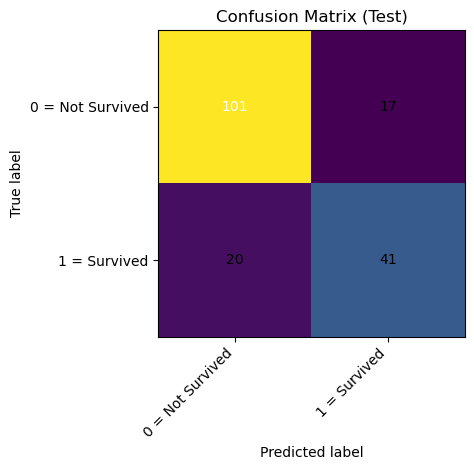

In [9]:
# =========================
# Part 5 — Inference & Evaluation (no CSV, with plots)
# =========================
# Assumes:
# - best_pipeline (fitted in Part 4)
# - You ran Part 3 earlier (but we reconstruct feature_cols here to be safe)

print("== Part 5: Predict on test set and visualize results ==")

# --- Rebuild feature_cols from train to ensure alignment ---

TARGET = "Survived"

df_train =  pd.read_csv("titanic_train.csv")
df_test  = pd.read_csv("titanic_test.csv")

feature_cols = [c for c in df_train.columns if c != TARGET]

# --- Prepare test matrix and predict ---
X_test = df_test[feature_cols].copy()
test_preds = best_pipeline.predict(X_test)

# --- Show first predictions as output (no CSV saving) ---
preds_df = pd.DataFrame({
    "index_in_test": range(len(test_preds)),
    "Predicted_Survived": test_preds
})
print("First 10 test predictions:")
print(preds_df.head(10).to_string(index=False))

# --- Visualization 1: Class distribution of predictions ---
plt.figure()
preds_df["Predicted_Survived"].value_counts().sort_index().plot(kind="bar")
plt.title("Predicted Class Counts (0 = Not Survived, 1 = Survived)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- If test has labels, compute and visualize evaluation metrics ---
if TARGET in df_test.columns:
    from sklearn.metrics import f1_score, classification_report, confusion_matrix

    y_test = df_test[TARGET].values
    f1 = f1_score(y_test, test_preds)
    print(f"\nF1 on test: {f1:.4f}\n")
    print("Classification report:")
    print(classification_report(y_test, test_preds, digits=4))

    # Visualization 2: Confusion matrix heatmap (matplotlib only, no custom colors)
    cm = confusion_matrix(y_test, test_preds)
    classes = ["0 = Not Survived", "1 = Survived"]

    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title("Confusion Matrix (Test)")
    plt.xticks([0,1], classes, rotation=45, ha="right")
    plt.yticks([0,1], classes)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    # annotate counts
    thresh = cm.max() / 2.0 if cm.max() else 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()
else:
    print("\nNo ground-truth labels in test set; showing predictions only.")
